<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#D63B52;
       font-size:220%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 20px;
          color:white;">
        <b>Guide on how to handle Skewed Distribution</b>
    </p>
</div>

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#4c69b9;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        The distribution of a data set is the shape of the graph when all possible values are plotted on a frequency graph (showing how often they occur). Today we will be learning how to handle skewed distribution of numerical data. By skewed data, I mean to say distributions which are not perfect bell shaped. The bell shaped ones are normal distributions. The ones which are not is skewed. Some are jagged as well. We will learn how to handle that today.
    </p>
</div>

In [2]:
# !pip install statsmodels -q

In [3]:
# importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

sns.set_theme()
sns.set_palette(palette = "rainbow")
%matplotlib inline

In [5]:
df = pd.read_csv("./Datasets/handle_Skewed_Distribution.csv")
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


***
#### There are 3 ways to know if a data is distributed. 
* QQ Plot
* Seaborn Histogram and Kdeplot
* Pandas Skew Function
***

In [7]:
# Skew function of Pandas
old_skew = df.skew().sort_values(ascending=False)
old_skew

LSTAT      0.905561
MEDV       0.775082
RM         0.081565
PTRATIO   -0.820578
dtype: float64

***
* *Positive value means the distribution is skewed to the right.* 
* *Negative value means the distribution is skewed to the left.* 
* *0 means perfect normal distribution. The bell shaped curve.*
***

In [11]:
print(list(enumerate(df.columns)))
for i in list(enumerate(df.columns)):
    print(i[0])

[(0, 'RM'), (1, 'LSTAT'), (2, 'PTRATIO'), (3, 'MEDV')]
0
1
2
3


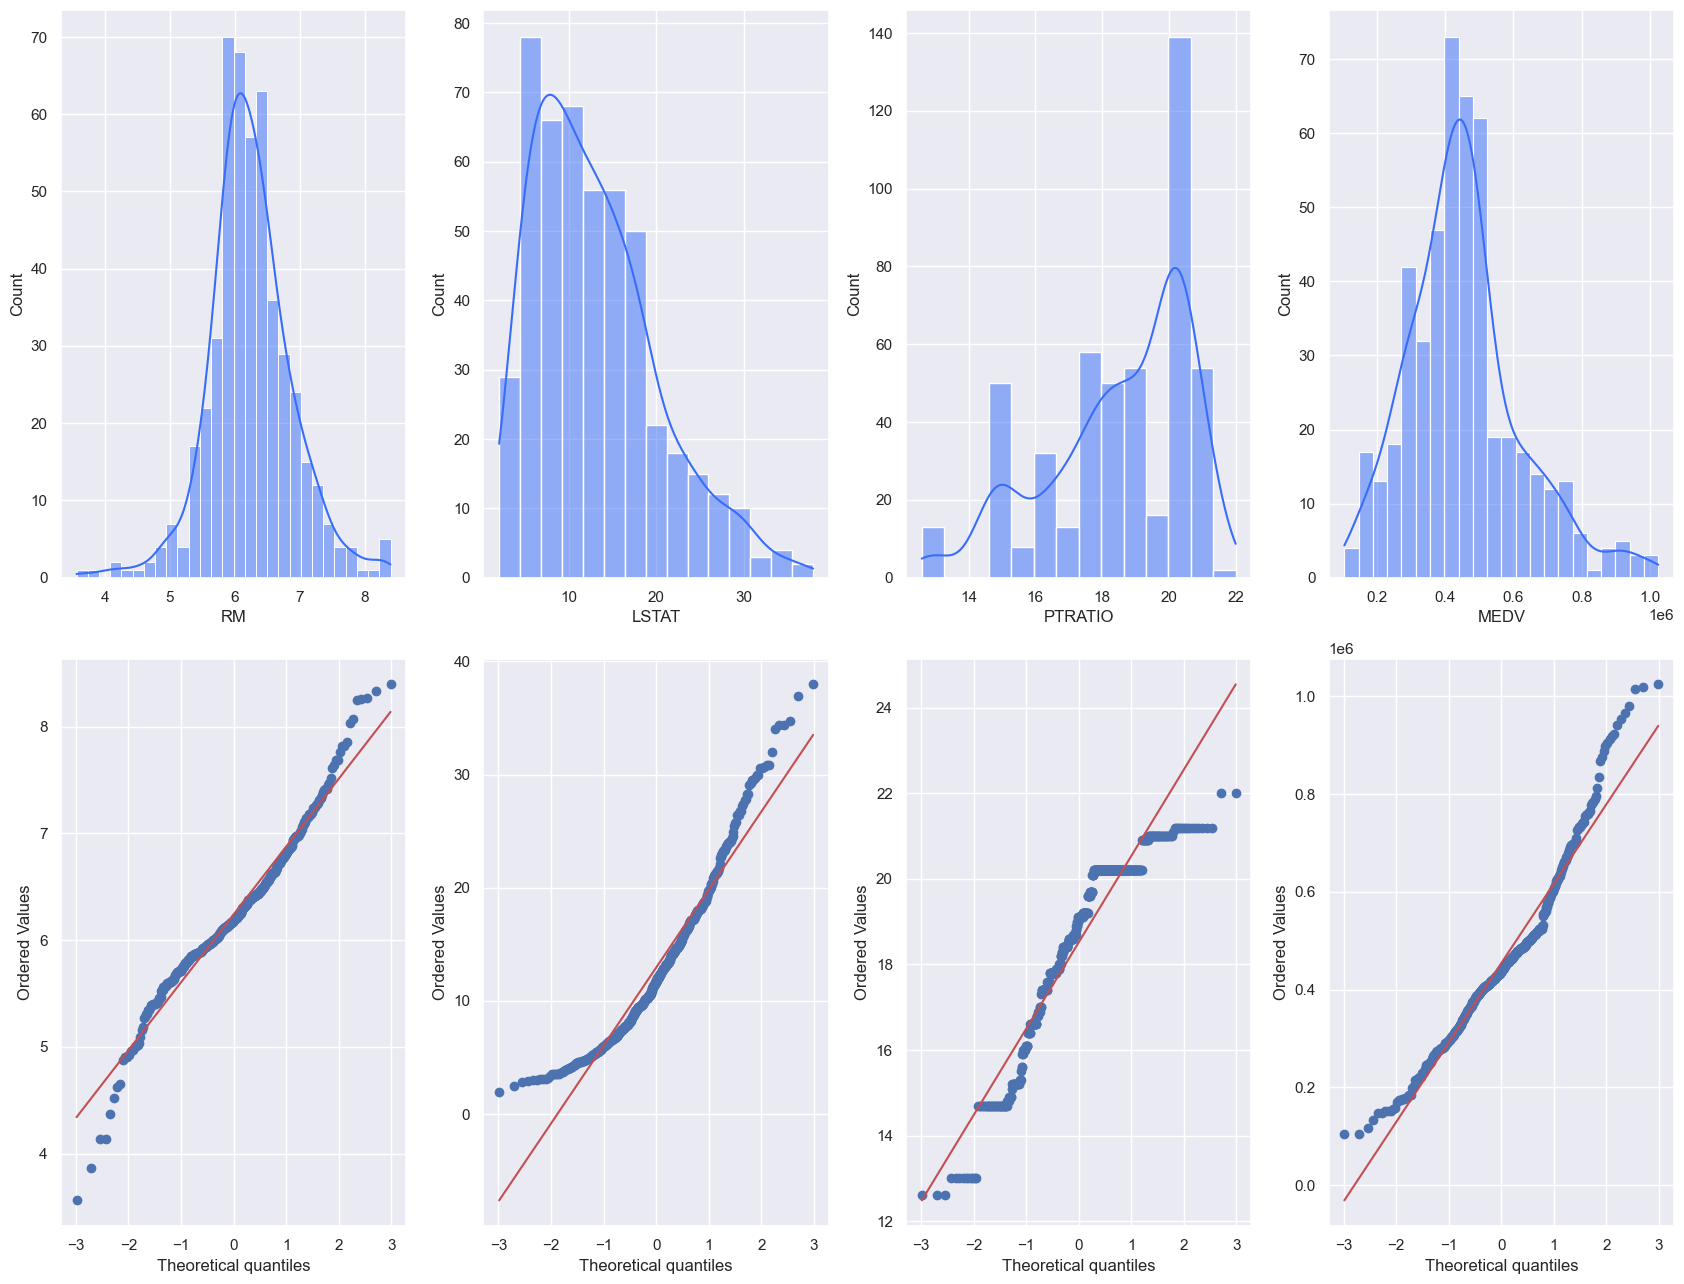

In [12]:
plt.figure(figsize=(17,13))
for i in list(enumerate(df.columns)):
    plt.subplot(2, 4, i[0]+1)
    sns.histplot(data = df[i[1]], kde=True)  # Histogram with KDE line
    
for i in list(enumerate(df.columns)):
    plt.subplot(2, 4,i[0]+5)
    stats.probplot(df[i[1]], dist="norm", plot=plt)   # QQ Plot
    plt.title("")
plt.tight_layout()  
plt.show()

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#4c69b9;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        From the above visualization we can understand that the column RM is more or less normally distributed, with a skew value of 0.08, which is very close to 0. LSTAT and MEDV is skewed to the right, PTRATIO is skewed to the left. We have to find appropriate ways to handle these skewed data and try to turn them to as normally distributed as possible. But we will only do this if your algorithm performs better in a normally distributed data. Some algorithms do not need a normal distribution and in those cases, we can ignore. We are not getting into the details of the data today and our main goal will be to handle the skewed data and turn it into normal distribution. 
    </p>
</div>

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#D63B52;
       font-size:220%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 20px;
          color:white;">
        <b>Mathematical Transformers</b>
    </p>
</div>

***
*We can handle skewed data using mathematical transformers. I will discuss some of the best transformers that sklearn library
provides us in order to handle skewed data. There are various types of Mathematical Transformers:*

- LSTAT      0.905561 (High Skewed to right)
- MEDV       0.775082 (Skewed to right)
- RM         0.081565 (Least/Negligible Skewed)
- PTRATIO   -0.820578 (High Skewed to left)

* **Function Transformers** (Check by hit & trial method)
 - Log Transform (For right skewed data)
 - Reciprocal Transform (For left skewed data)
 - Square Transform (You can try)
 - Sq Root Transform (You can try)
 - Custom Transform (You can try)
* **Power Transformers**
 - Box-Cox (Work good for all type of skewed but cannot be used for negative values and 0)
 - Yeo-Johnson (Work good for all type of skewed)
* **Quantile Transformer**
***

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#AF65C1;
       font-size:150%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        <b>1 . Log Transform</b>
    </p>
</div>

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#59729F;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
       In this transformation technique, we will use log of each and every value in the feature. So when we use logs of a certain distribution, we will use their exponents instead of the actual value. This makes the X scale exponentially grow in value and that is the reason why only <b>Right Skewed</b> data transforms to a more or less normal distribution. Mind you, only use it in cases where your algorithm will benefit from a normal distribution, for example, in cases of linear regression models. Also, only use it when your data is skewed to the right.
    </p>
</div>

In [26]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

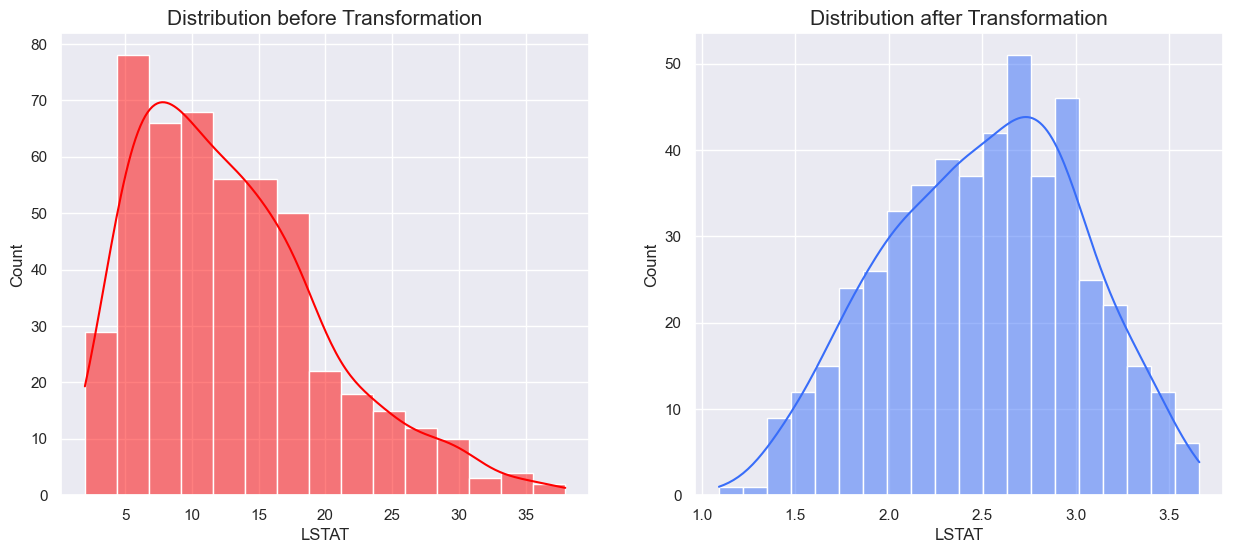

Skewness was 0.91 before & is -0.15 after Log transformation.


In [27]:
def logTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_log = pd.DataFrame(logTr.fit_transform(df))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_log,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_log.skew()[0],2)} after Log transformation.")
    
logTrans(feature="LSTAT")

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#4c69b9;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        The skewness decreased from an extreme right skew to a moderately normal distribution and a negligible left skew. <br>
        Closer the skew value to 0, more normal the distribution is.<br>
        <br>
        Now we will apply Log Transformation to a left skewed data and you will see how the distribution gets more skewed.
    </p>
</div>

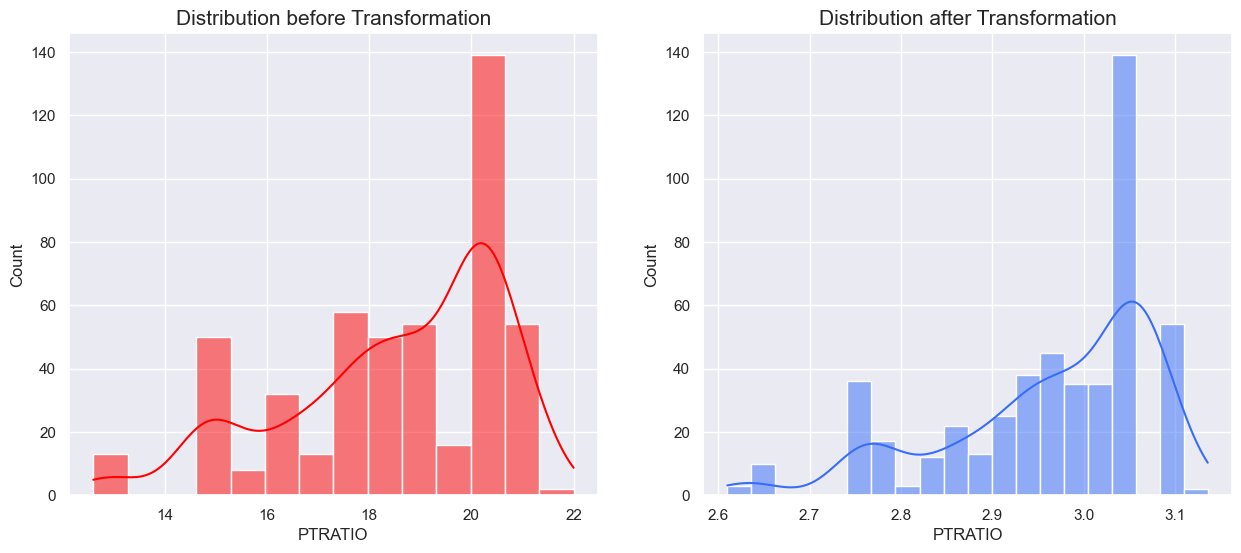

Skewness was -0.82 before & is -1.03 after Log transformation.


In [28]:
logTrans(feature="PTRATIO")

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#AC0000;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        Hence proved, never use Log transformation for left skewed data. It will mess your data up! 
    </p>
</div>

***

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#AF65C1;
       font-size:150%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        <b>2. Square Transform </b>
    </p>
</div>

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#59729F;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
       In this transformation technique, we will use square of each and every value in the feature. This will only work on <b>Left Skewed</b> data. So, use Square Transform for left skewed data and Log Transform for right skewed data. Simple.
    </p>
</div>

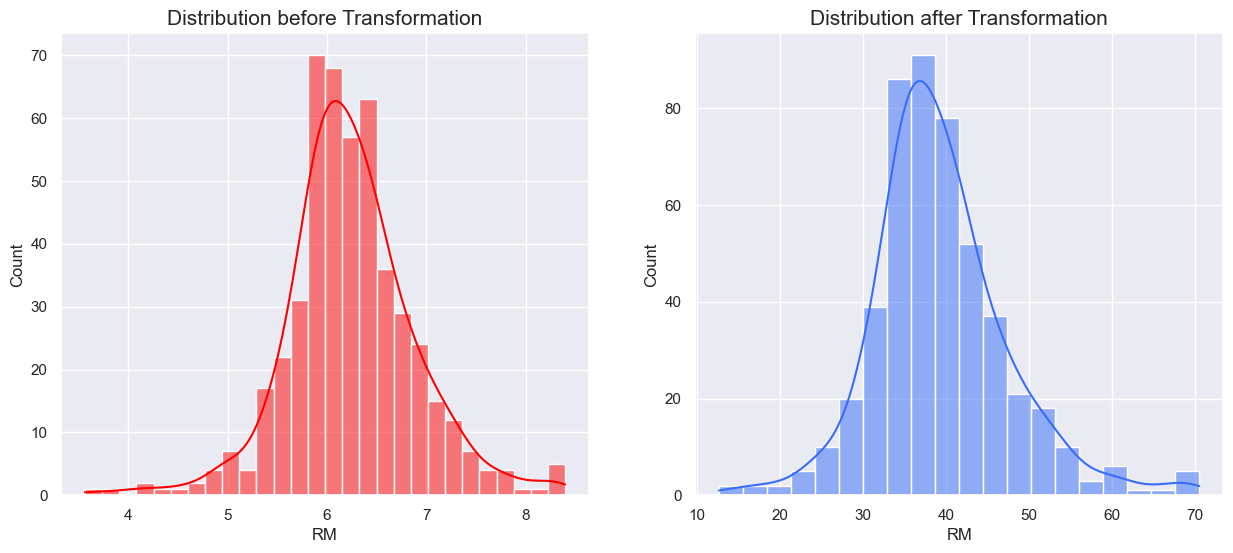

Skewness was 0.08 before & is 0.65 after Square transformation.


In [29]:
def squareTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.square), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_square = pd.DataFrame(logTr.fit_transform(df))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_square,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()

    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_square.skew()[0],2)} after Square transformation.")
    
squareTrans(feature="RM")

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#4c69b9;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        RM column was a little bit left skewed, however, the square transformation did not work and the skewness increased by a lot.<br>
        <br>
        Now we will apply Square Transformation to a right skewed data and you will see how the distribution gets more skewed.
    </p>
</div>

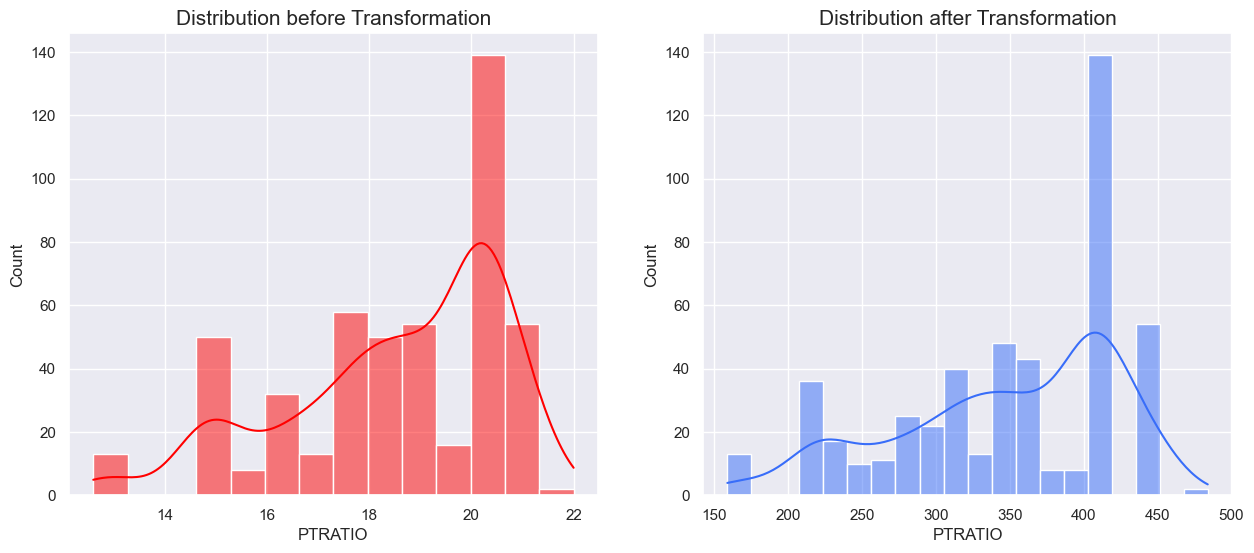

Skewness was -0.82 before & is -0.62 after Square transformation.


In [31]:
squareTrans(feature="PTRATIO")

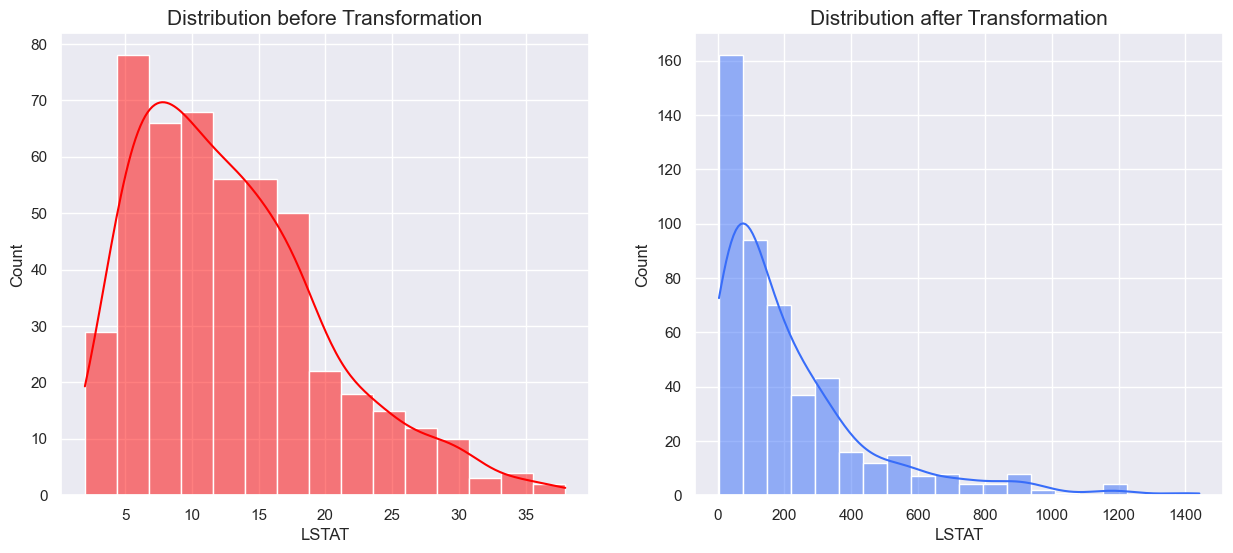

Skewness was 0.91 before & is 2.06 after Square transformation.


In [33]:
squareTrans(feature="LSTAT")

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#AC0000;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        Hence proved, never use Square transformation for right skewed data. It will mess your data up! 
    </p>
</div>

***

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#AF65C1;
       font-size:150%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        <b>3. Reciprocal Transform, Squre Root and other Transformers </b>
    </p>
</div>

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#59729F;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
       You should already have a clear picture of how we are using column transformer to apply a Function Transformer class of sklearn to the column of the dataframe and we can use any transformation we want. For example, we have tried log and square as of now. We can try, cube, square root, reciprocal or 1/x of the value as well. This is more like a trial and error and comes under fine tuning your feature engineering so that you can optimize your model. Try out as many things as you want! Comment your results. 
    </p>
</div>

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#4c69b9;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        For a demonstration I will be using cube transformer in RM feature to show you how it works compared to square transformer. 
    </p>
</div>

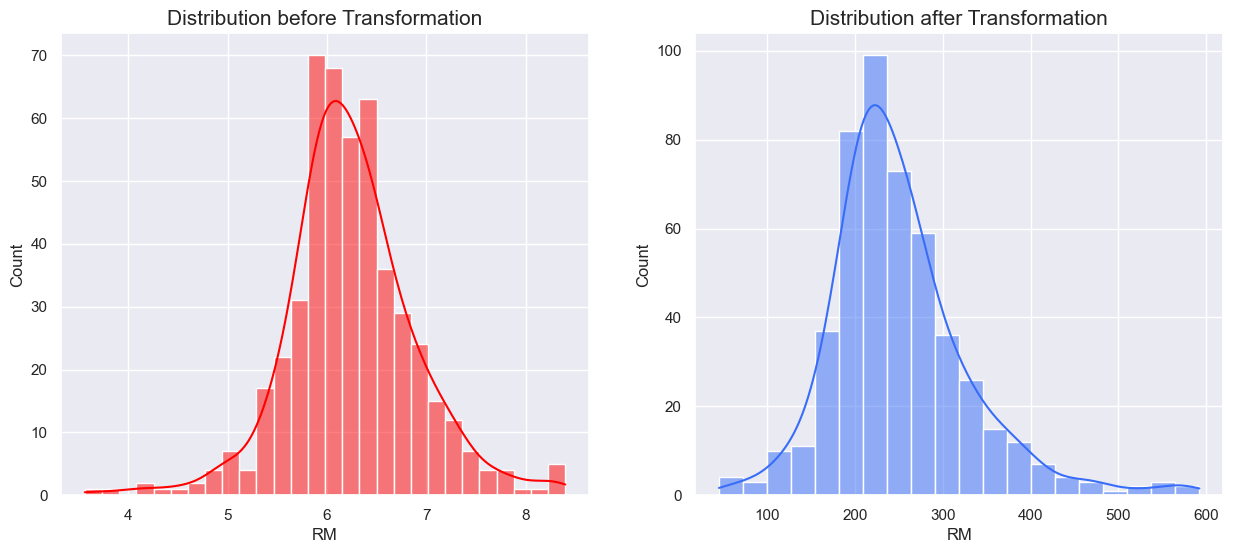

Skewness was 0.08 before & is 1.16 after cube transformation.


In [34]:
def cubeTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(lambda x: x**3), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_cube = pd.DataFrame(logTr.fit_transform(df))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_cube,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_cube.skew()[0],2)} after cube transformation.")
    
cubeTrans(feature="RM")

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#AF65C1;
       font-size:150%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        <b>4. Box-Cox </b>
    </p>
</div>

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#59729F;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
       A Box Cox transformation is a transformation of a non-normal dependent variables into a normal shape. So the fun part is, box cox can be used in general for all type of distributions and it will by itself find the lambda value (check the formula below to know what lambda here is). <b>Box-Cox cannot be used for negative values and 0.</b>
    </p>
</div>

#### Formula of Box-Cox Transformation:

![DataDistribution.PNG](https://miro.medium.com/max/880/1*_vXfmcxyVPu6c8qr4-nEcg.png)

In [35]:
from sklearn.preprocessing import PowerTransformer

#### By default the PowerTransformer will standard scale the column so you need to specifically mention it if you do not want to scale.

In [38]:
df.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

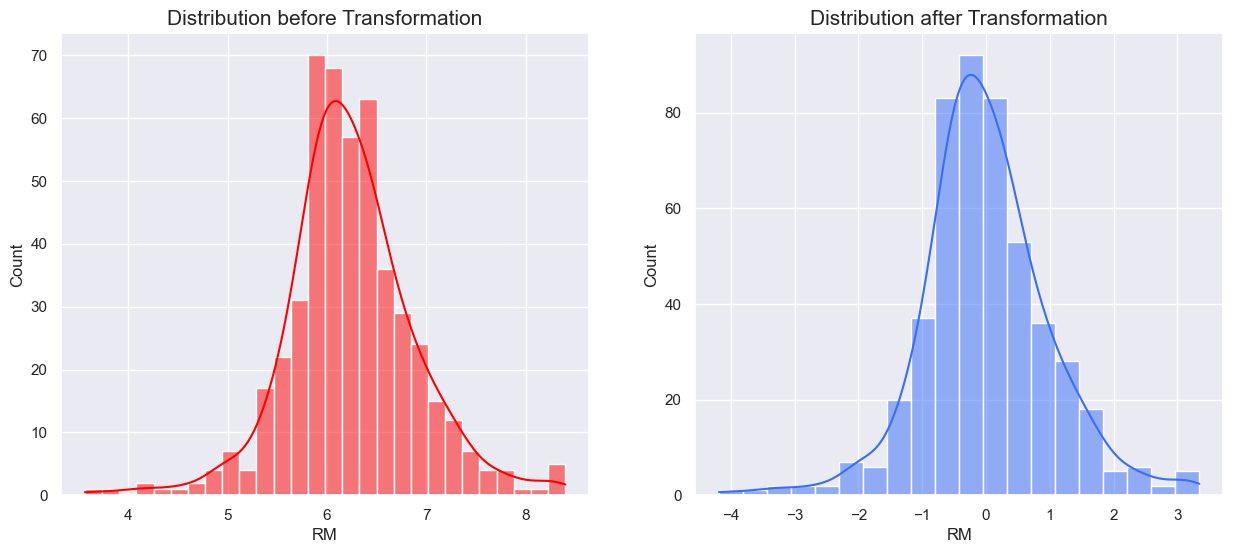

Skewness was 0.08 before & is 0.07 after Box-cox transformation.


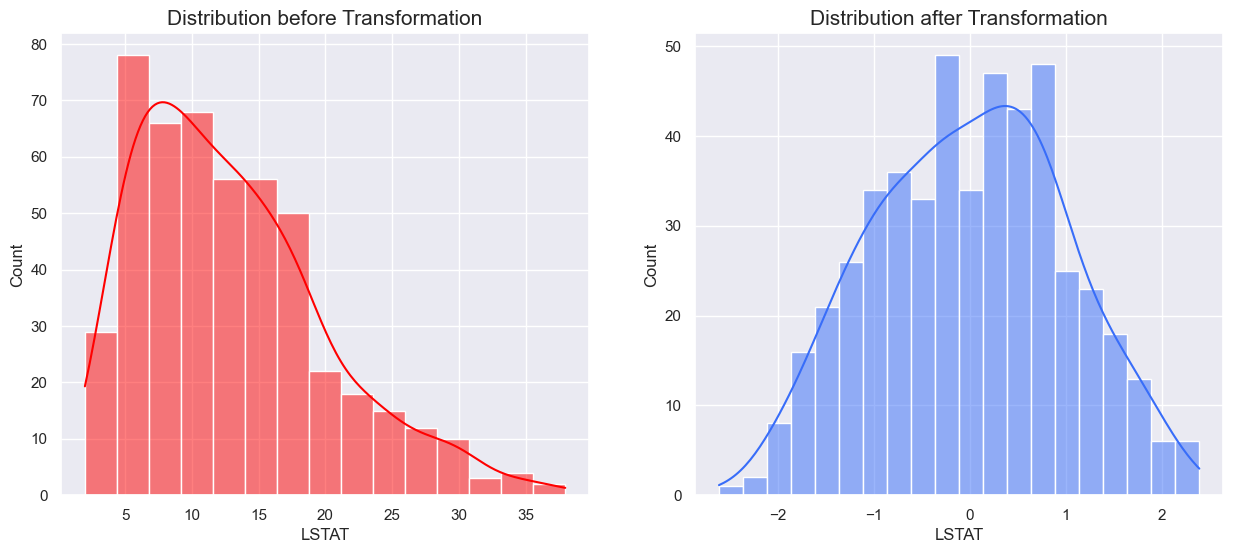

Skewness was 0.91 before & is -0.02 after Box-cox transformation.


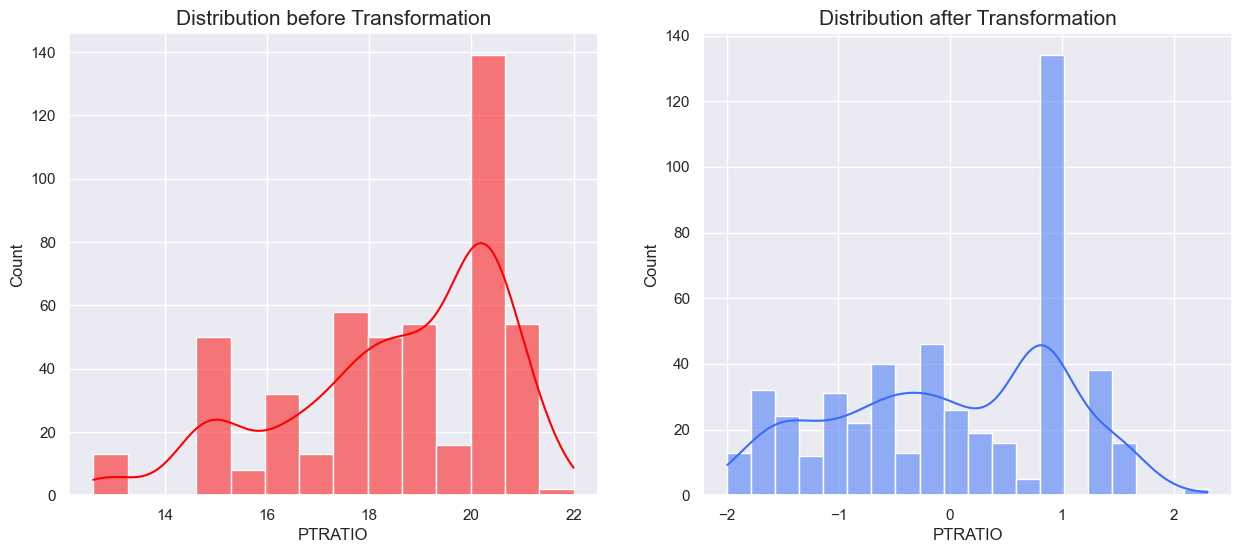

Skewness was -0.82 before & is -0.21 after Box-cox transformation.


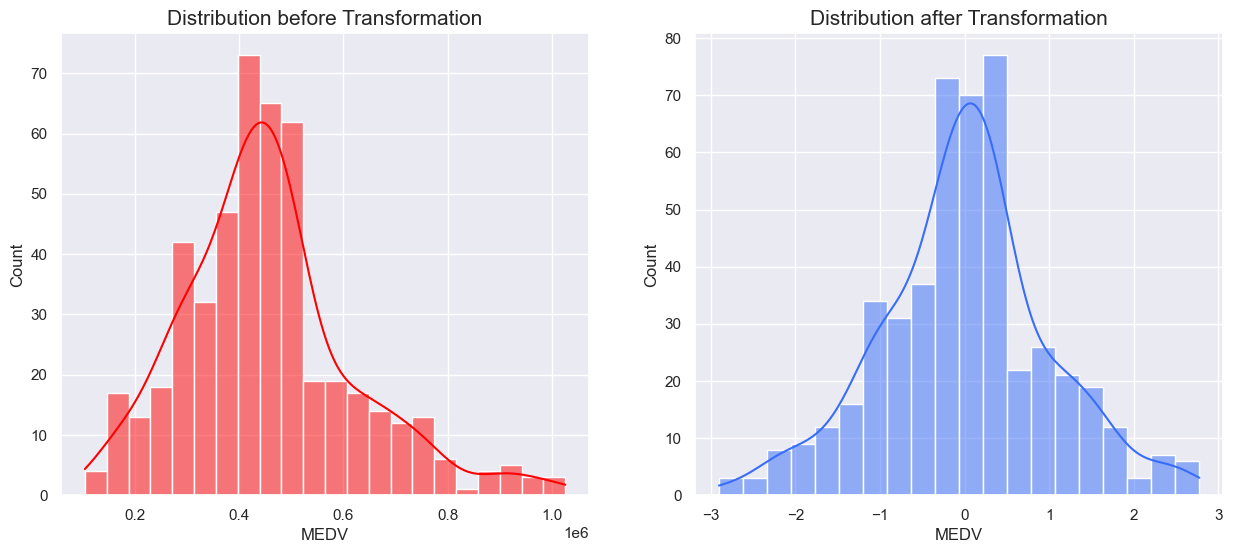

Skewness was 0.78 before & is 0.02 after Box-cox transformation.


In [39]:
def boxcoxtrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    boxcoxTr = PowerTransformer(method = "box-cox", standardize=True)

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_boxcox = pd.DataFrame(boxcoxTr.fit_transform(df[feature].values.reshape(-1,1)))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_boxcox,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_boxcox.skew()[0],2)} after Box-cox transformation.")
    
boxcoxtrans(feature="RM")
boxcoxtrans(feature="LSTAT")
boxcoxtrans(feature="PTRATIO")
boxcoxtrans(feature="MEDV")

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#4c69b9;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        Did you see how it automatically found out the value of the exponent that will be best for this data? Amazing isn't it?<br>
        <b>The next method will blow your mind!</b>
    </p>
</div>

***

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#AF65C1;
       font-size:150%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        <b>5. Yeo-Johnson </b>
    </p>
</div>

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#59729F;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
       This is Box-cox but better.The limitation on box-cox is it does not work with negative values and 0. Yeo-Johnson fixes that and can be used for any distribution, both positive and negative. So, if you do not understand anything about distribution and know that your algorithm will be benifiting from a normal distribution, then copy pase this code and you are fine. LoL! Never copy paste codes, understand it. Atleast a basic intuition is better than mugging it up. <br>
        <b>In sklearn.preprocessing.PowerTransformer class, this method is the default, so you know it's good! Have fun!  </b>
    </p>
</div>

#### Formula of Yeo-Johnson Transformation:

![DataDistribution.PNG](https://miro.medium.com/max/1004/1*2rslF39_ATSMOEEtG0zMmw.png)

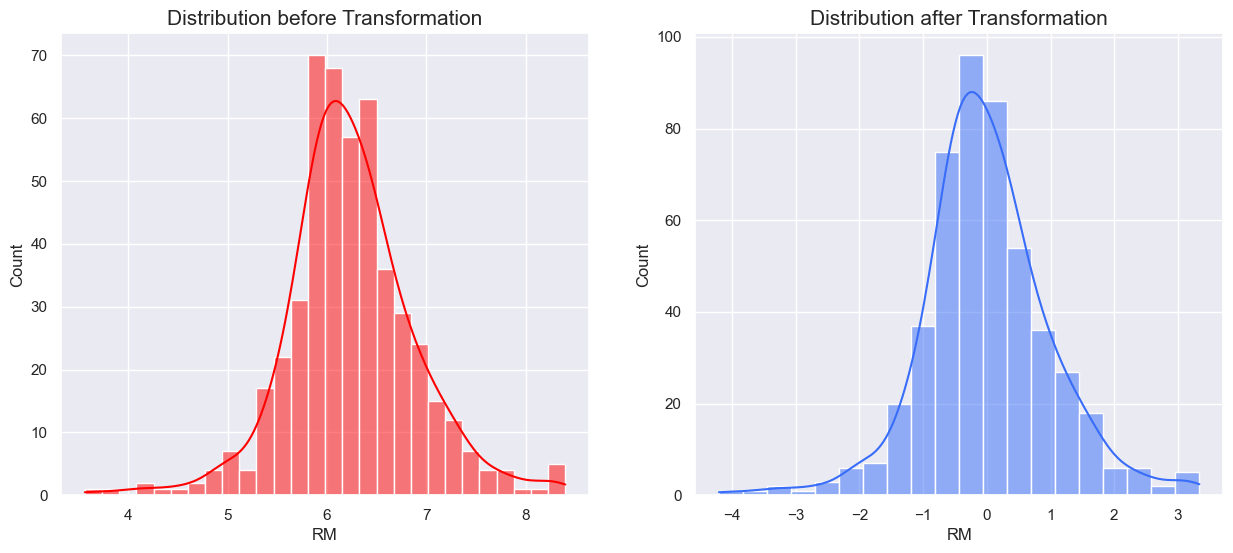

Skewness was 0.08 before & is 0.06 after Yeo-johnson transformation.


In [40]:
def yeojohntrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    yeojohnTr = PowerTransformer(standardize=True)   # not using method attribute as yeo-johnson is the default

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_yeojohn = pd.DataFrame(yeojohnTr.fit_transform(df[feature].values.reshape(-1,1)))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_yeojohn,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_yeojohn.skew()[0],2)} after Yeo-johnson transformation.")
    
yeojohntrans(feature="RM")

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#4c69b9;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        <b>By far the best result for the feature RM! Let's check it out on other features as well.</b> <br>
        Let's check the same Yeo Johnson transformation in other features. 
    </p>
</div>

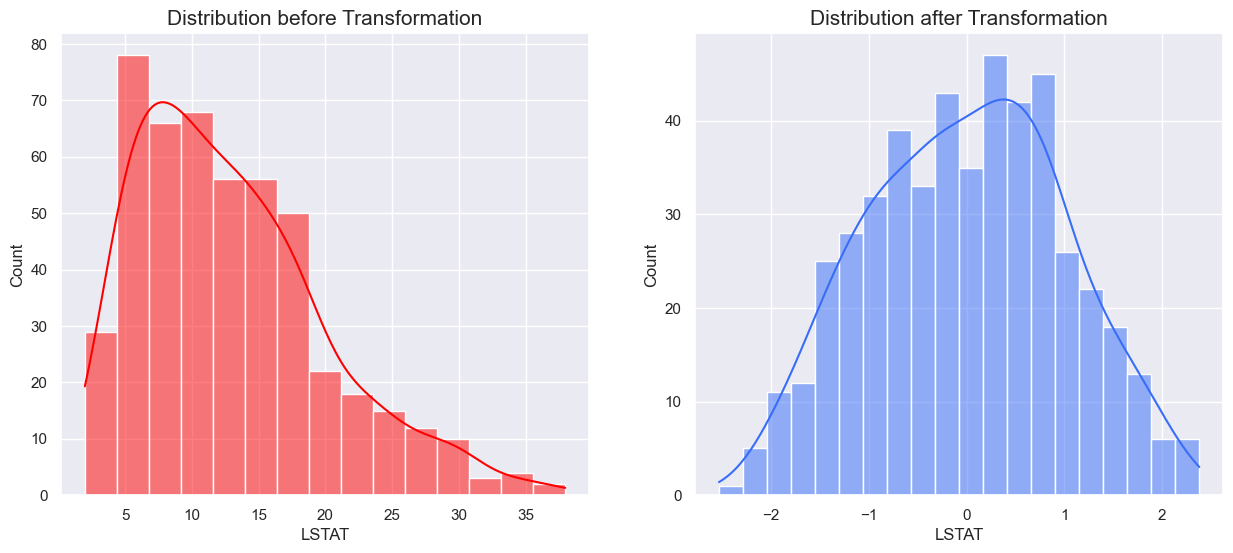

Skewness was 0.91 before & is -0.01 after Yeo-johnson transformation.


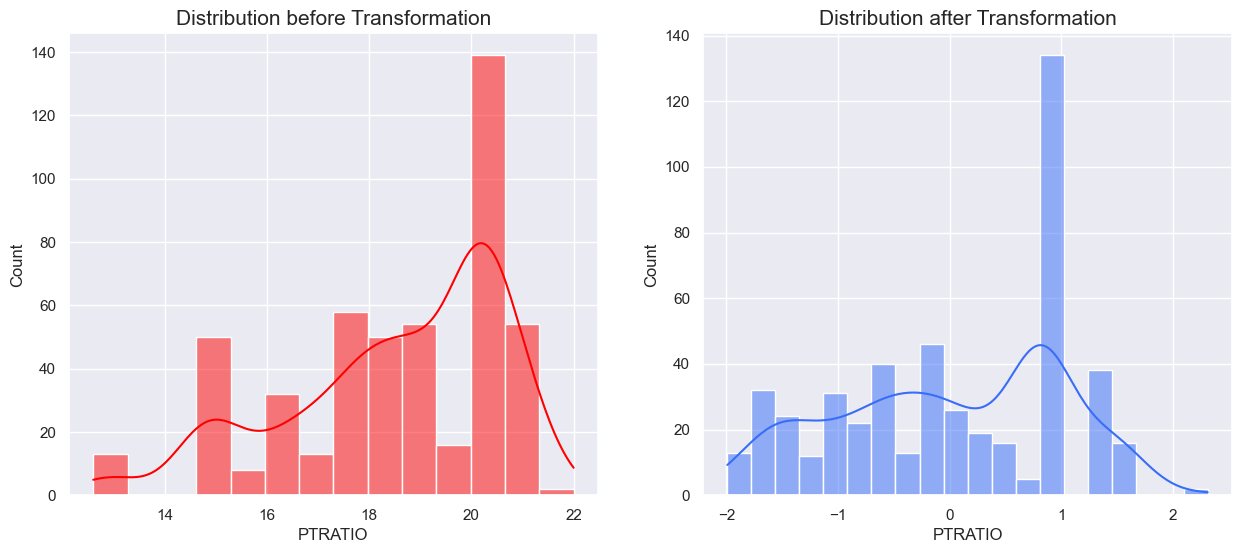

Skewness was -0.82 before & is -0.21 after Yeo-johnson transformation.


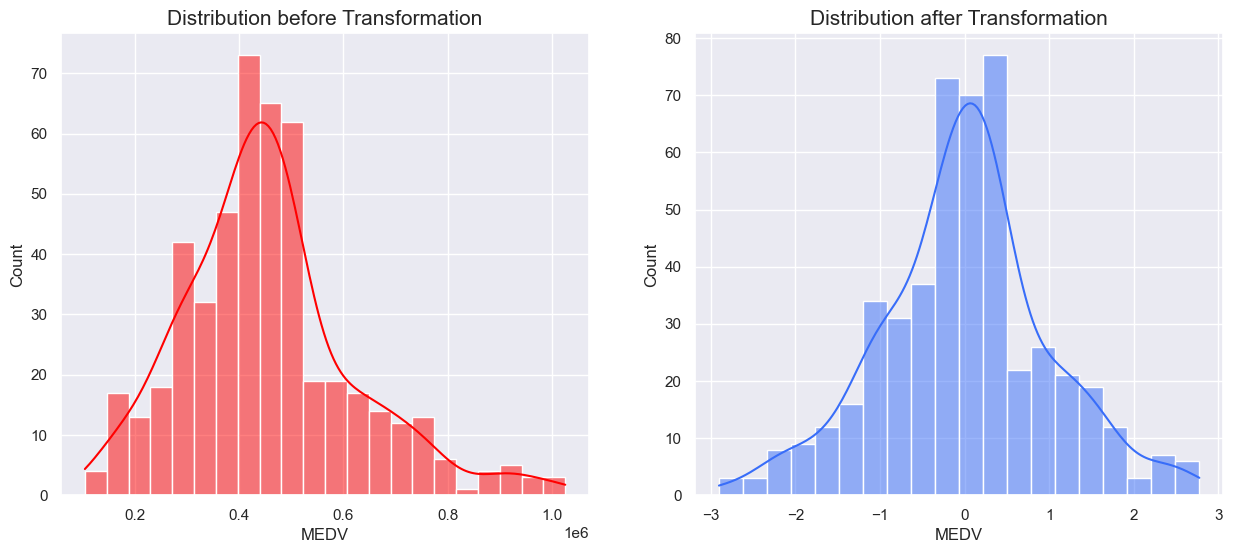

Skewness was 0.78 before & is 0.02 after Yeo-johnson transformation.


In [41]:
for i in df.columns[1:]:
    yeojohntrans(i)

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#AF65C1;
       font-size:150%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        <b>6. Quantile Transformer </b>
    </p>
</div>

In [50]:
df.shape[0]

489

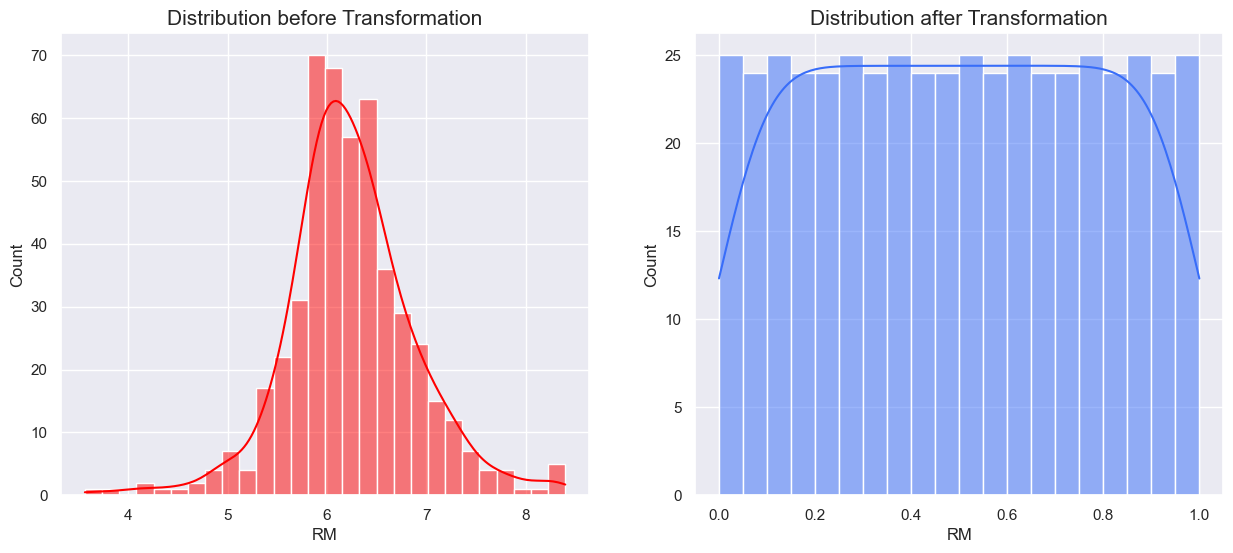

Skewness was 0.08 before & is -0.0 after Quantile Transformer.


In [55]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt

def quantiletrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    # Apply QuantileTransformer
    qt = QuantileTransformer(n_quantiles=df.shape[0], output_distribution='uniform', random_state=0)
    # Key parameters of the QuantileTransformer:

    # n_quantiles: The number of quantiles to utilize in the adjustment. This is set to 1000 by default, however it may be adjusted based on the size and quantity of information required.
    # Output_distribution: The desired distribution of the adjusted data. This may be adjusted to either ‘uniform’ or ‘normal’, with ‘uniform’ being the default.
    # Subsample: The number of samples to utilize in calculating the quantiles. By default, this applies to the whole collection.
    # random_state: The random seed used to shuffle the data.

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_quantile = pd.DataFrame(qt.fit_transform(df[feature].values.reshape(-1,1)))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_quantile, bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_quantile.skew()[0],2)} after Quantile Transformer.")
    
quantiletrans(feature="RM")

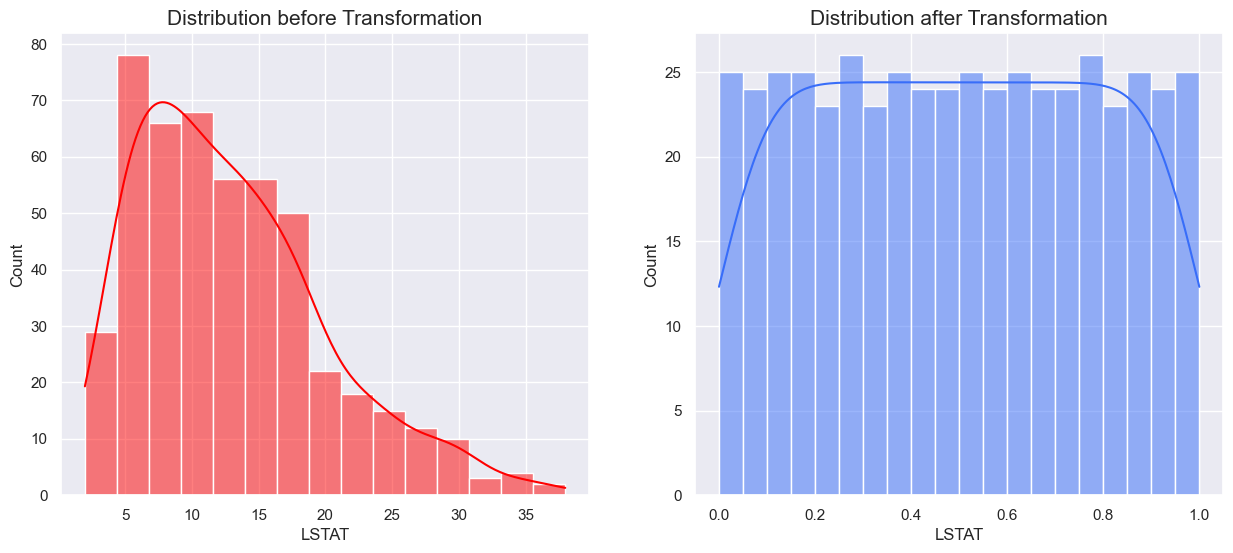

Skewness was 0.91 before & is 0.0 after Quantile Transformer.


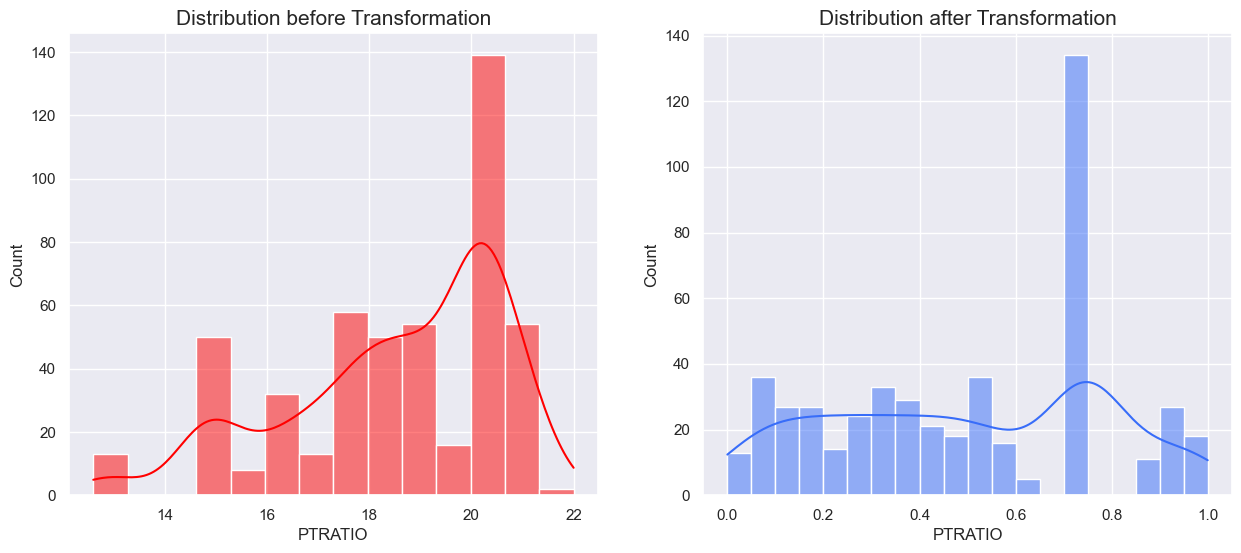

Skewness was -0.82 before & is -0.05 after Quantile Transformer.


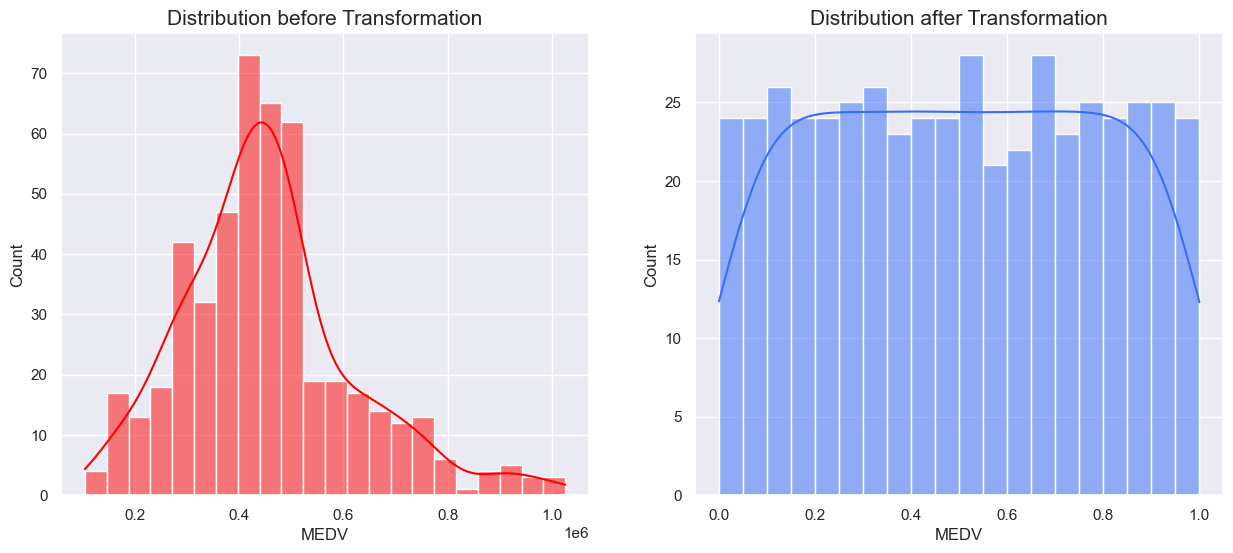

Skewness was 0.78 before & is 0.0 after Quantile Transformer.


In [56]:
for i in df.columns[1:]:
    quantiletrans(i)